# ___AdaBoost - Supervised Machine Learning___
---

## ___What is Adaptive Boosting(AdaBoost)?___

_AdaBoost algorithm, short for __Adaptive Boosting__, is a Boosting technique that is used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances. Boosting is used to reduce bias as well as the variance for supervised learning. It works on the principle where learners are grown sequentially. Except for the first, each subsequent learner is grown from previously grown learners. In simple words, weak learners are converted into strong ones. Adaboost algorithm also works on the same principle as boosting, but there is a slight difference in working._

_AdaBoost can be used to boost the performance of any machine learning algorithm. It is best used with weak learners. These are models that achieve accuracy just above random chance on a classification problem._

_The most suited and therefore most common algorithm used with AdaBoost are decision trees with one level. Because these trees are so short and only contain one decision for classification, they are often called decision stumps._

_Each instance in the training dataset is weighted. The initial weight is set to:_

$$weight(xi) = 1/n$$

_Where xi is the i’th training instance and n is the number of training instances._

## ___How AdaBoost Works?___

_First, let us discuss the working of boosting. It makes n number of decision trees during the training period of data. As the first decision tree/model is made, the record which is incorrectly classified during the first model is given more priority. Only these records are sent as input for the second model. The process will go on until we specify a number of base learners we want to create. Remember, the repetition of records is allowed with all boosting techniques._

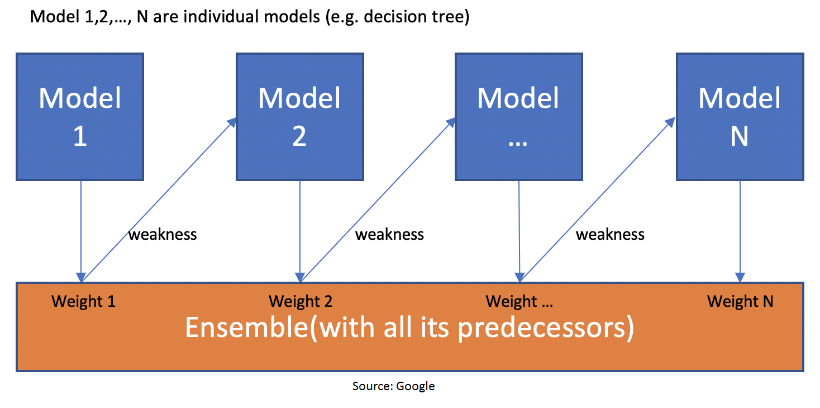

_This figure shows that when the first model is made and the errors from the first model are noted by the algorithm, the record which is incorrectly classified is given as the input for the next model. This process is repeated until the specified condition is met. As you can see in the figure, there are n number of models made by taking the errors from the previous model. This is how boosting works. The models 1,2, 3,…, N are individual models that can be known as decision trees. All types of boosting models work on the same principle._

_Since we know the boosting principle,it will be easy to understand the AdaBoost algorithm. Let’s deep dive into the working of Adaboost. When the random forest is used, the algorithm makes n number of trees. It makes proper trees that consist of a start node with several leaves nodes. Some trees might be bigger than others, but there is no fixed depth in a random forest. But with Adaboost, that’s not the case. In AdaBoost, the algorithm only makes a node with two leaves, and this is known as __Stump__._

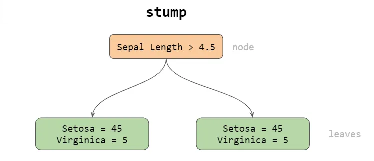

_The figure here represents the stump. It can be seen clearly that it has only one node with only two leaves. These stumps are weak learners, and boosting techniques prefer this. The order of stumps is very important in AdaBoost. The error of the first stump influences how the other stump is made. Let’s understand this with an example._

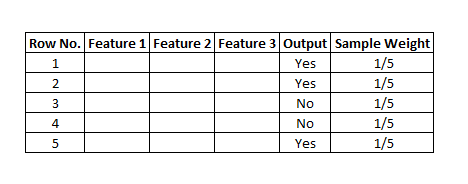

_Here I have created a sample dataset that consists of only three features, and the output is in categorical form. The image shows the actual representation of the dataset. As the output is in binary/categorical form, it becomes a classification problem. In real life, the dataset can have any number of records and features in it. Let us consider 5 datasets for explanation purposes. The output is in categorical form and, here it’s Yes or No. All these records will get a sample weight. To assign some sample weight, the formula used is, W=1/N where N is the number of records. In this dataset, there are only 5 records, so the sample weight becomes 1/5 initially. Every record gets the same weight. In this case, it’s 1/5._

___Step 1 – Creating First Base Learner___

_Now it’s time to create the first base learner. The algorithm takes the first feature, i.e., feature 1, and creates the first stump f1. It will create the same number of stumps as the number of features. Here, it will create 3 stumps as there are only 3 features in this dataset. From all these stumps it will create three decision trees and can be called stumps base learner model. Out of these 3 models, the algorithm selects only one. For selecting a base learner, there are two properties, those are, Gini and Entropy. We must calculate Gini or Entropy the same way it is calculated for decision trees. The stump that has the least value will be the first base learner. In the below figure, all the 3 stumps can be made with 3 features. The number below the leaves represents the correctly and incorrectly classified records. By using these records, the Gini or entropy index is calculated. The stump that has the least entropy or Gini will be selected for the base learner. Let’s assume that the entropy index is the least for stump 1. So, let’s take stump 1, i.e., feature 1 as our first base learner._

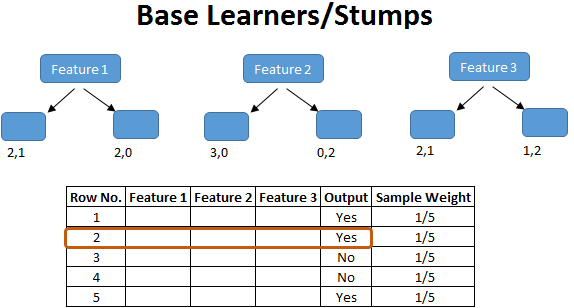

_Here, feature (f1) has classified 2 records correctly and 1 incorrectly. The row in the figure that is marked red is incorrectly classified. For this, we will be calculating the total error._

___Step 2 – Calculating the Total Error (TE)___

_The total error is the sum of all the errors in the classified record for sample weights. In our case, there is only 1 error, so Total Error (TE) = 1/5._

___Step 3 – Calculating Performance of Stump___

_Formula for calculating Performance of Stump is:_

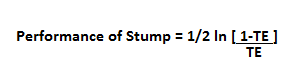

_where, ln is natural log and TE is Total Error._

_In our case, TE is 1/5. By putting the value of total error in the above formula and after solving, we get the value for the performance of Stump as 0.693. You must be wondering why its necessary to calculate the TE and performance of stump? The answer is, we must update the sample weight before proceeding for the next model or stage because if the same weight is applied, we receive the output from the first model. In boosting, only the wrong records/incorrectly classified records got more preference than the correctly classified records. Thus, only the wrong records from the decision tree/stump are passed on to another stump. While in AdaBoost, both records were allowed to pass, the wrong records are repeated more than the correct ones. We must increase the weight for the wrongly classified records and decrease the weight for the correctly classified records. In the next step, we will be updating the weights based on the performance of the stump._

___Step 4 – Updating Weights___

_For incorrectly classified records the formula is:_

$$New Sample Weight = Sample Weight * e^(Performance)$$

_In our case $Sample weight = 1/5 so, 1/5 * e^ (0.693) = 0.399$_

_And for correctly classified records, we use the same formula with a negative sign with performance, so that the weight for correctly classified records will reduce compared to the incorrect classified ones. The formula is:_

$$New Sample Weight = Sample Weight * e^- (Performance)$$

_Putting the values, $1/5 * e^-(0.693) = 0.100$_

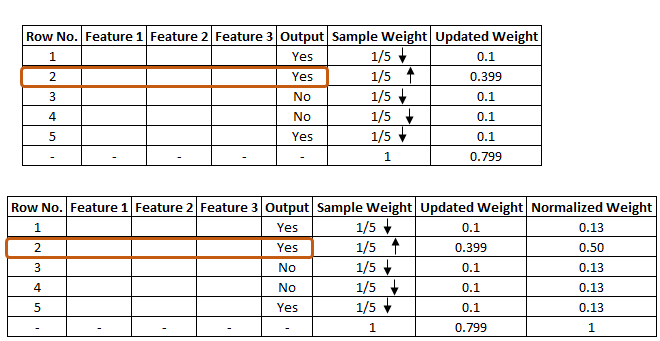

_The updated weight for all the records can be seen in the figure. As is known, the total sum of all the weights should be 1. But in this case, one can see that the total updated weight of all the records is not 1, it’s 0.799. To make the total sum 1, one must divide every updated weight by the total sum of updated weight. For example, if our updated weight is 0.399 and we divide this by 0.799, i.e. 0.399/0.799=0.50._ 

_0.50 can be known as the normalized weight. In the below figure, we can see all the normalized weight and their sum is approximately 1._

___Step 5 – Creating New Dataset___

_Now, it’s time to create a new dataset from our previous one. In the new dataset, the frequency of incorrectly classified records will be more than the correct ones. While considering these normalized weights, we have to create a new dataset and that dataset is based on normalized weights. It will probably select the wrong records for training purposes. That will be the second decision tree/stump. To make a new dataset based on normalized weight, the algorithm will divide it into buckets._

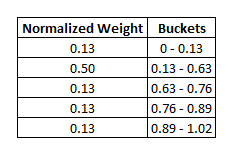

_So, our first bucket is from 0 – 0.13, second will be from 0.13 – 0.63(0.13+0.50), third will be from 0.63 – 0.76(0.63+0.13), and so on. After this the algorithm will run 5 iterations to select different-different records from the older dataset. Suppose, in 1st iteration, the algorithm will take a random value 0.46, then it will go and see in which bucket that value falls and selects that records in the new dataset, then again it will select a random value and see in which bucket it is and select that record for the new dataset and the same process is repeated for 5 times._

_There is a high probability for the wrong records to get selected several times. This will be the new dataset. It can be seen in the below image that row number 2 has been selected multiple times from the older dataset as that row is incorrectly classified in the previous dataset._

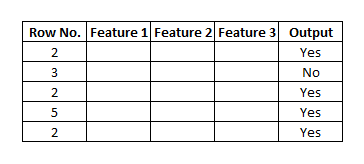

_Based on this new dataset, the algorithm will again create a new decision tree/stump and it will repeat the same process from step 1 till it sequentially passes through all stumps and finds that there is less error when compared with normalized weight that we had in the initial stage._

## ___How does the algorithm decide output for test data?___

_Suppose with the above dataset, the algorithm constructed 3 decision trees or stumps, the test dataset will pass through all the stumps which have been constructed by the algorithm. While passing through the 1st stump, it gives the output as 1, passing through 2nd stump it again gives the output as 1, and while passing through 3rd stump it gives the output as 0. So, in AdaBoost algorithm also, the majority of votes take place between the stumps, the same as in random trees. And in this case, the final output will be 1. This is how the output with test data is decided._

_[Reference](https://www.youtube.com/watch?v=NLRO1-jp5F8)_

In [1]:
# Packages / libraries

import os #provides functions for interacting with the operating system

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
import math
from math import sqrt
import random
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

## ___Classification Model___

In [3]:
# load the iris datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# fit a CART model to the data
model = AdaBoostClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
predicted_y = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 8  0  0]
 [ 0 15  1]
 [ 0  2 12]]


___Model using SVM as base estimator___

In [4]:
from sklearn.svm import SVC

svc = SVC(probability=True, kernel= 'linear' )

ada_svm = AdaBoostClassifier(n_estimators=50,learning_rate=1,base_estimator=svc)
ada_svm.fit(X_train,y_train)

y_pred = ada_svm.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.93        14

    accuracy                           0.95        38
   macro avg       0.96      0.96      0.96        38
weighted avg       0.95      0.95      0.95        38

[[ 8  0  0]
 [ 0 14  2]
 [ 0  0 14]]


## ___Regression Model___

AdaBoostRegressor()
0.8678456015243917
0.03683216714898841


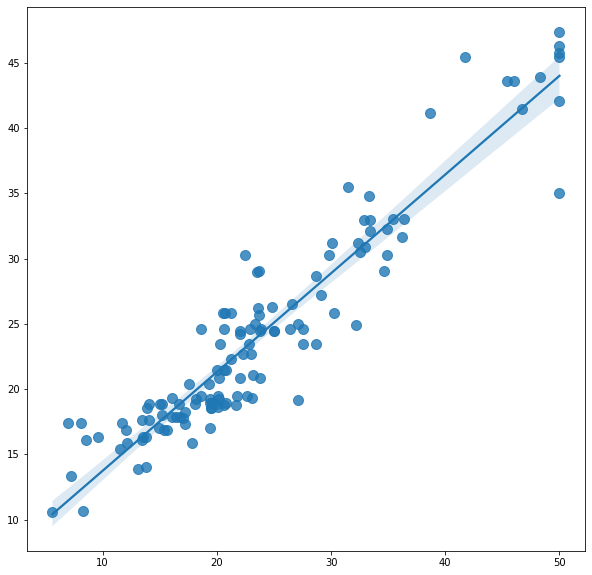

In [5]:
# load the boston datasets
dataset = datasets.load_boston()
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)    

# fit a AdaBoost model to the data
model = AdaBoostRegressor()
model.fit(X_train, y_train)
print(model)

# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

# summarize the fit of the model
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

# plot regression
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

_To conclude that Adaptive Boosting is a good ensemble technique and can be used for both Classification and Regression problems. But in most cases, it is used for classification problems. It is better than any other model as it improves model accuracy, one can check this by going in sequence. First try decision trees and then go for the random forest, next apply to boost and finally go for AdaBoost. We can see that the accuracy keeps increasing as we follow the above sequence. The weight assigning technique after every iteration makes AdaBoost algorithm different from all other boosting algorithms. And that’s the best thing about the AdaBoost algorithm._